In [15]:
import pandas as pd

In [16]:
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
for encoding in encodings:
    try:
        data = pd.read_csv(r'C:\Users\Sanjay Mali\OneDrive\Documents\nexus\train.csv', encoding=encoding)
        break 
    except UnicodeDecodeError:
        continue 


In [17]:
 data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [18]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None


In [19]:
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan       

In [20]:
text_content = data['text'] 
sentiment_labels = data['sentiment']  


print("\nText Content:")
print(text_content.head())

print("\nSentiment Labels:")
print(sentiment_labels.head())


Text Content:
0                  I`d have responded, if I were going
1        Sooo SAD I will miss you here in San Diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     Sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

Sentiment Labels:
0     neutral
1    negative
2    negative
3    negative
4    negative
Name: sentiment, dtype: object


In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [22]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Sanjay
[nltk_data]     Mali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\Sanjay
[nltk_data]     Mali\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to C:\Users\Sanjay
[nltk_data]     Mali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
def preprocess_text(text):
   
    if not isinstance(text, str):
        return ''

    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text
data['preprocessed_text'] = data['text'].apply(preprocess_text)

print(data[['text', 'preprocessed_text']].head())

                                                text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                        preprocessed_text  
0                      id responded going  
1                 sooo sad miss san diego  
2                            bos bullying  
3                   interview leave alone  
4  son couldnt put release already bought  


In [24]:
sentiment_counts = data['sentiment'].value_counts()
print("\nDistribution of Sentiment Labels:")
print(sentiment_counts)


Distribution of Sentiment Labels:
sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64


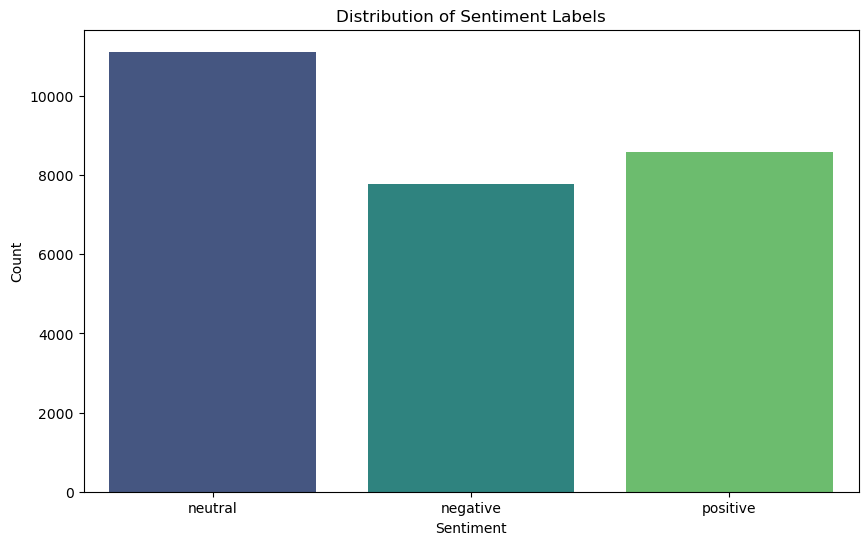

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

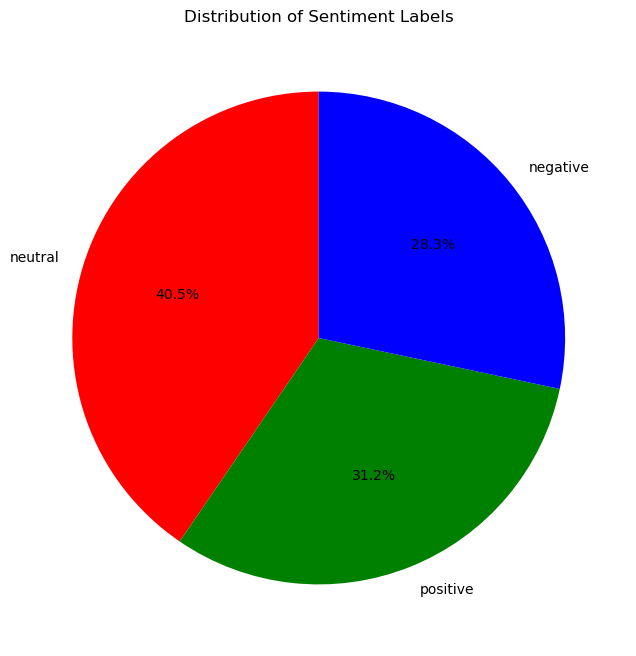

In [28]:
plt.figure(figsize=(8, 8))
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Distribution of Sentiment Labels')
plt.ylabel('')
plt.show()

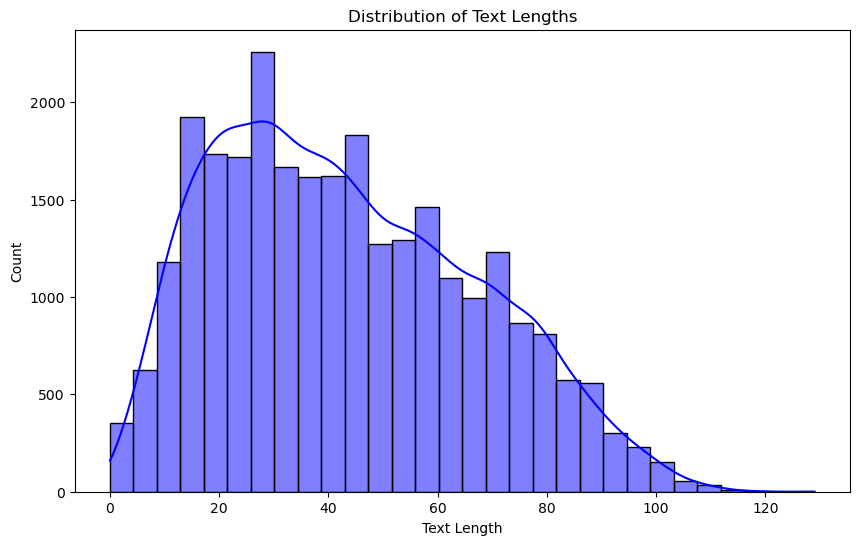

In [27]:

data['text_length'] = data['preprocessed_text'].apply(len)


plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

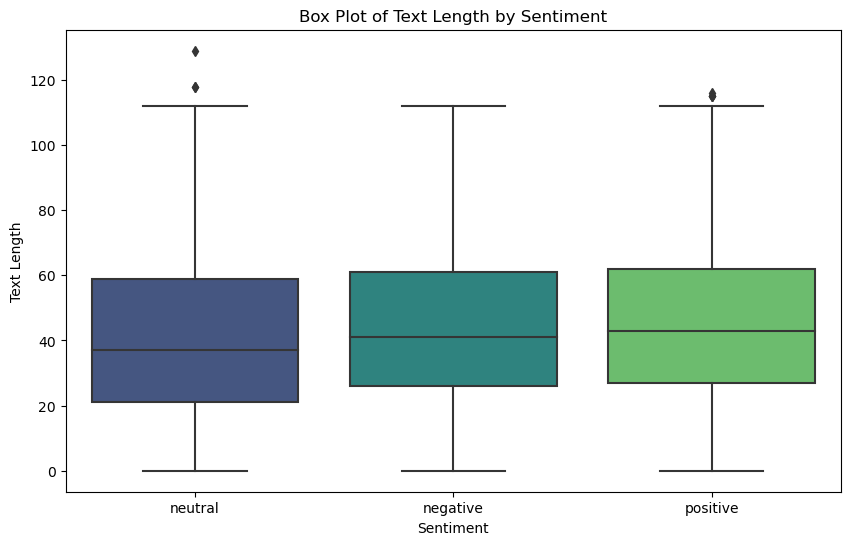

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', data=data, palette='viridis')
plt.title('Box Plot of Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000) 

tfidf_matrix = tfidf_vectorizer.fit_transform(data['preprocessed_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df.head())

   aaaah  aah  aaron   ab  abandoned  abby  ability  abit  able  absolutely  \
0    0.0  0.0    0.0  0.0        0.0   0.0      0.0   0.0   0.0         0.0   
1    0.0  0.0    0.0  0.0        0.0   0.0      0.0   0.0   0.0         0.0   
2    0.0  0.0    0.0  0.0        0.0   0.0      0.0   0.0   0.0         0.0   
3    0.0  0.0    0.0  0.0        0.0   0.0      0.0   0.0   0.0         0.0   
4    0.0  0.0    0.0  0.0        0.0   0.0      0.0   0.0   0.0         0.0   

   ...  yup  zac  zach  zealand  zelda  zero  zoe  zombie  zone  zoo  
0  ...  0.0  0.0   0.0      0.0    0.0   0.0  0.0     0.0   0.0  0.0  
1  ...  0.0  0.0   0.0      0.0    0.0   0.0  0.0     0.0   0.0  0.0  
2  ...  0.0  0.0   0.0      0.0    0.0   0.0  0.0     0.0   0.0  0.0  
3  ...  0.0  0.0   0.0      0.0    0.0   0.0  0.0     0.0   0.0  0.0  
4  ...  0.0  0.0   0.0      0.0    0.0   0.0  0.0     0.0   0.0  0.0  

[5 rows x 5000 columns]


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['sentiment'], test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


print("\nPredictions:", y_pred[:10])
print("True Labels:", y_test[:10].values)

Accuracy: 0.7016554484264144
Precision: 0.7116497254186686
Recall: 0.7016554484264144
F1 Score: 0.701149373127315

Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.59      0.66      1562
     neutral       0.64      0.77      0.70      2230
    positive       0.77      0.71      0.74      1705

    accuracy                           0.70      5497
   macro avg       0.72      0.69      0.70      5497
weighted avg       0.71      0.70      0.70      5497


Predictions: ['neutral' 'neutral' 'neutral' 'negative' 'positive' 'neutral' 'neutral'
 'positive' 'neutral' 'neutral']
True Labels: ['positive' 'neutral' 'neutral' 'negative' 'positive' 'neutral' 'negative'
 'positive' 'negative' 'neutral']


In [33]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.68978849 0.69388219 0.70343416 0.6881965  0.69290264]
Mean CV Score: 0.6936407961172965


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

coefficients = svm_model.coef_

n_classes = len(svm_model.classes_)
for i in range(n_classes):
    class_name = svm_model.classes_[i]
    top_features_idx = np.argsort(coefficients[i])[-10:]
    top_features = feature_names[top_features_idx]
    print(f"Top 10 features for class '{class_name}':")
    print(top_features)


Top 10 features for class 'negative':
['aaaah']
Top 10 features for class 'neutral':
['aaaah']
Top 10 features for class 'positive':
['aaaah']


In [35]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 928  543   91]
 [ 248 1719  263]
 [  63  432 1210]]


In [36]:
from sklearn.metrics import precision_score, recall_score

class_precisions = precision_score(y_test, y_pred, average=None)
class_recalls = recall_score(y_test, y_pred, average=None)

for i, class_name in enumerate(svm_model.classes_):
    print(f"Class '{class_name}': Precision = {class_precisions[i]}, Recall = {class_recalls[i]}")


Class 'negative': Precision = 0.7489911218724778, Recall = 0.5941101152368758
Class 'neutral': Precision = 0.6380846325167038, Recall = 0.7708520179372197
Class 'positive': Precision = 0.7736572890025576, Recall = 0.7096774193548387
